In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-beta1


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

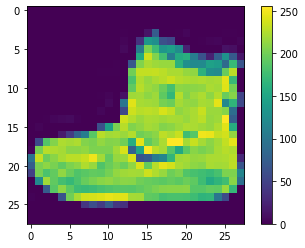

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

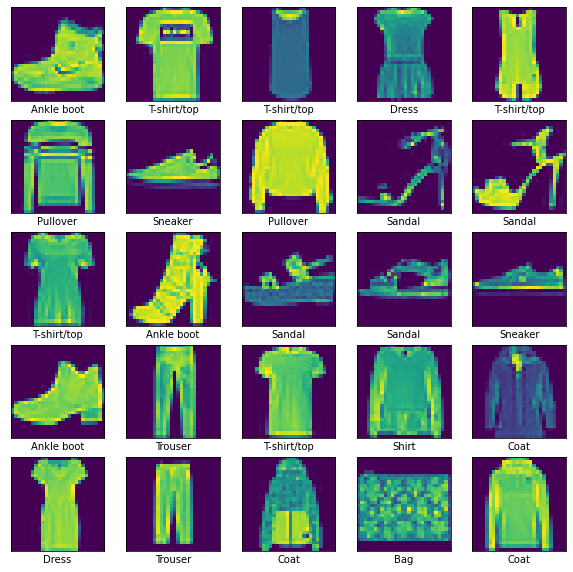

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.4975 - accuracy: 0.8244
Epoch 2/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3774 - accuracy: 0.8648
Epoch 3/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3377 - accuracy: 0.8766
Epoch 4/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3124 - accuracy: 0.8857
Epoch 5/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2957 - accuracy: 0.8907
Epoch 6/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2824 - accuracy: 0.8963
Epoch 7/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2688 - accuracy: 0.9002
Epoch 8/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2610 - accuracy: 0.9024
Epoch 9/10
60000/60000 [==============================] - ETA: 0s - loss: 0.2477 - accuracy: 0.90 - 6s 97us/sample - l

In [26]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3776 - accuracy: 0.8692

Test accuracy: 0.8692


In [27]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [28]:
predictions = probability_model.predict(test_images)

In [42]:
predictions[2]

array([1.2253151e-10, 1.0000000e+00, 4.0145225e-13, 7.2223694e-10,
       4.6354462e-13, 4.6139836e-21, 5.3262960e-13, 1.0042535e-25,
       2.6121835e-14, 3.1909348e-20], dtype=float32)

In [43]:
np.argmax(predictions[2])

1

In [44]:
test_labels[2]

1

In [39]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

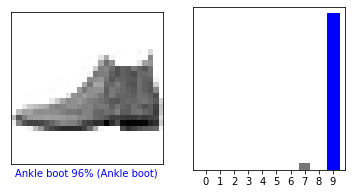

In [40]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

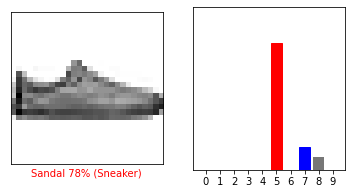

In [41]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

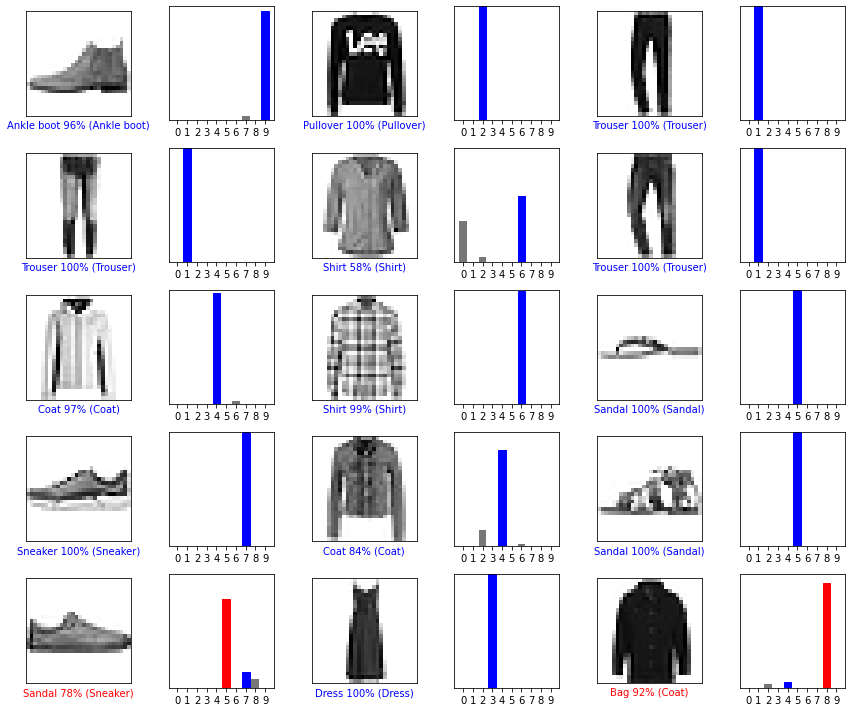

In [35]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()